In [2]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

from utils import load_property_data

D:\Anaconda3\envs\imperial\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\Anaconda3\envs\imperial\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
D:\Anaconda3\envs\imperial\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
def plot_pca(file):
  smiles, labels = load_property_data('e_iso_pi')
  invalid_indices = np.argwhere(np.isnan(labels))
  
  labels = np.delete(labels, invalid_indices)
  
  features = pd.read_csv(file).to_numpy()[:, 2:]
  features = np.delete(features, invalid_indices, axis=0)

  pca = PCA(n_components = 2)
  components = pca.fit_transform(features)
  
  print('explained variance: ', pca.explained_variance_ratio_)
  plt.scatter(components[:, 0], components[:, 1], c=labels, cmap='bwr')
  plt.show()

explained variance:  [0.14742698 0.12472223]


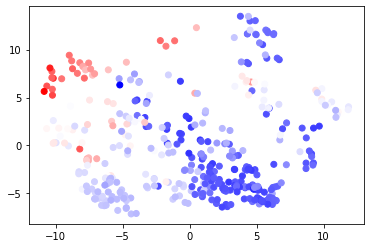

In [4]:
plot_pca('./processed_data/molbert_features.csv')

explained variance:  [0.09402779 0.07124659]


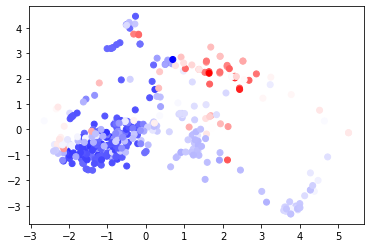

In [21]:
plot_pca('./processed_data/morgan_fingerprints.csv')

### Because I've witnessed this one components explaining all variance, Im wondering if the accuracy of random forest could be improved by using the component as input feature

In [4]:
from utils import load_features_and_labels
from models.random_forest import train_rf_model

X, y = load_features_and_labels('./processed_data/rdkit_descriptors.csv' ,'e_iso_pi')
rf = train_rf_model(X, y)


Beginning training loop...

mean R^2: 0.8591 +- 0.0106
mean RMSE: 24.5307 +- 0.6909
mean MAE: 15.8197 +- 0.4874



In [5]:
from utils import load_features_and_labels
from models.random_forest import train_rf_model

X, y = load_features_and_labels('./processed_data/rdkit_descriptors.csv' ,'e_iso_pi')
rf = train_rf_model(X, y, n_components=2, use_pca=True)


Beginning training loop...
(PCA) Fraction of variance retained is: 1.0
(PCA) Fraction of variance retained is: 1.0
(PCA) Fraction of variance retained is: 1.0
(PCA) Fraction of variance retained is: 1.0
(PCA) Fraction of variance retained is: 1.0
(PCA) Fraction of variance retained is: 0.9999999991510152
(PCA) Fraction of variance retained is: 1.0
(PCA) Fraction of variance retained is: 0.9999999991691269
(PCA) Fraction of variance retained is: 0.9999999991543195
(PCA) Fraction of variance retained is: 1.0

mean R^2: 0.5172 +- 0.0294
mean RMSE: 45.6173 +- 1.4758
mean MAE: 30.8010 +- 1.0034



### This turned out to no really be the case :/

In [22]:
from utils import load_features_and_labels
from models.random_forest import train_rf_model

X, y = load_features_and_labels('./processed_data/morgan_fingerprints.csv' ,'e_iso_pi')
rf = train_rf_model(X, y)


Beginning training loop...

mean R^2: 0.8564 +- 0.0122
mean RMSE: 24.8744 +- 1.3260
mean MAE: 15.3308 +- 0.6889



In [26]:
from utils import load_features_and_labels
from models.random_forest import train_rf_model

X, y = load_features_and_labels('./processed_data/morgan_fingerprints.csv' ,'e_iso_pi')
rf = train_rf_model(X, y, n_components=100, use_pca=True)


Beginning training loop...
(PCA) Fraction of variance retained is: 0.9290076766760421
(PCA) Fraction of variance retained is: 0.9315138991443944
(PCA) Fraction of variance retained is: 0.9324558364233364
(PCA) Fraction of variance retained is: 0.9269878204812396
(PCA) Fraction of variance retained is: 0.9365865315174196
(PCA) Fraction of variance retained is: 0.9300676996486921
(PCA) Fraction of variance retained is: 0.9316981269644292
(PCA) Fraction of variance retained is: 0.9301808103746322
(PCA) Fraction of variance retained is: 0.928580982319596
(PCA) Fraction of variance retained is: 0.9305361084223062

mean R^2: 0.7387 +- 0.0182
mean RMSE: 33.6515 +- 1.5552
mean MAE: 23.9943 +- 1.0198



### So using dimensionality reduction on the input features just results in loss of information & therefore less well performing models

### Using Molbert embedded features

In [5]:
from utils import load_features_and_labels
from models.random_forest import train_rf_model

X, y = load_features_and_labels('./processed_data/molbert_features.csv' ,'e_iso_pi')
rf = train_rf_model(X, y)


Beginning training loop...

mean R^2: 0.8687 +- 0.0110
mean RMSE: 23.7194 +- 1.1824
mean MAE: 15.6820 +- 0.6255



In [2]:
from utils import load_features_and_labels
from models.random_forest import train_rf_model

X, y = load_features_and_labels('./processed_data/molbert_features.csv' ,'z_iso_pi')
rf = train_rf_model(X, y)

print('---------')

X, y = load_features_and_labels('./processed_data/morgan_fingerprints.csv' ,'z_iso_pi')
rf = train_rf_model(X, y)


Beginning training loop...

mean R^2: 0.3909 +- 0.0649
mean RMSE: 12.4893 +- 0.7620
mean MAE: 9.6694 +- 0.5666

---------

Beginning training loop...

mean R^2: 0.3046 +- 0.0426
mean RMSE: 13.5126 +- 0.7816
mean MAE: 9.7340 +- 0.4672



GPR vs RF for e_iso_pi on rdkit descriptors

In [ ]:
from utils import load_features_and_labels
from models.random_forest import train_rf_model
from models.gaussian_process import train_gp_model

X, y = load_features_and_labels('./processed_data/rdkit_descriptors.csv' ,'e_iso_pi')
train_rf_model(X, y)
train_gp_model(X, y)

GPR vs RF for e_iso_pi on molbert features

In [ ]:
from utils import load_features_and_labels
from models.random_forest import train_rf_model
from models.gaussian_process import train_gp_model

X, y = load_features_and_labels('./processed_data/molbert_features.csv' ,'e_iso_pi')
train_rf_model(X, y)
train_gp_model(X, y)